In [175]:
import os
import datetime

from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

Output hidden; open in https://colab.research.google.com to view.

In [176]:
data="/content/drive/MyDrive/P2M/Data/Data.csv"
df = pd.read_csv(data)
df.head()

,Mvt,Temp,Date,Time,TempExt
0,0.0,29.0,2021-08-10,00:00:04,36
1,1.0,30.0,2021-08-10,00:00:08,36
2,0.0,30.0,2021-08-10,00:00:12,36
3,1.0,29.0,2021-08-10,00:00:14,36
4,0.0,29.0,2021-08-10,00:00:21,36


In [177]:
df1=df.copy()
df1.head()

,Mvt,Temp,Date,Time,TempExt
0,0.0,29.0,2021-08-10,00:00:04,36
1,1.0,30.0,2021-08-10,00:00:08,36
2,0.0,30.0,2021-08-10,00:00:12,36
3,1.0,29.0,2021-08-10,00:00:14,36
4,0.0,29.0,2021-08-10,00:00:21,36


In [178]:
indexNames = df1[ df1['Temp'] <0 ].index
indexNames

Int64Index([505994], dtype='int64')

In [179]:
df1 = df1.drop(columns="Mvt")

In [180]:
df1['DateTime']=pd.to_datetime(df1['Date'] + ' ' + df1['Time'])
df1['date'] = pd.to_datetime(df1['DateTime'], format='%d-%m-%Y %H:%M')
df1 = df1.drop(columns="Date")
df1 = df1.drop(columns="Time")

In [181]:
df1 = df1.drop(columns="DateTime")

In [182]:
df1['hour'] = df1['date'].apply(lambda x : x.hour)
df1['year'] = df1['date'].apply(lambda x : x.year)
df1['month'] = df1['date'].apply(lambda x : x.month)
df1['day'] = df1['date'].apply(lambda x : x.day)
df1.head()

,Temp,TempExt,date,hour,year,month,day
0,29.0,36,2021-08-10 00:00:04,0,2021,8,10
1,30.0,36,2021-08-10 00:00:08,0,2021,8,10
2,30.0,36,2021-08-10 00:00:12,0,2021,8,10
3,29.0,36,2021-08-10 00:00:14,0,2021,8,10
4,29.0,36,2021-08-10 00:00:21,0,2021,8,10


In [183]:
df_without_duplicates = df1.drop_duplicates(
    subset=['hour','day','month'], keep="last")

In [184]:
df1.set_index('date')

,Temp,TempExt,hour,year,month,day
date,,,,,,
2021-08-10 00:00:04,29.0,36,0,2021,8,10
2021-08-10 00:00:08,30.0,36,0,2021,8,10
2021-08-10 00:00:12,30.0,36,0,2021,8,10
2021-08-10 00:00:14,29.0,36,0,2021,8,10
2021-08-10 00:00:21,29.0,36,0,2021,8,10
...,...,...,...,...,...,...
2021-12-31 23:59:53,17.0,10,23,2021,12,31
2021-12-31 23:59:54,17.0,10,23,2021,12,31
2021-12-31 23:59:56,17.0,10,23,2021,12,31


In [185]:
df1.head()

,Temp,TempExt,date,hour,year,month,day
0,29.0,36,2021-08-10 00:00:04,0,2021,8,10
1,30.0,36,2021-08-10 00:00:08,0,2021,8,10
2,30.0,36,2021-08-10 00:00:12,0,2021,8,10
3,29.0,36,2021-08-10 00:00:14,0,2021,8,10
4,29.0,36,2021-08-10 00:00:21,0,2021,8,10


In [186]:
train =df1.iloc[:1727]
test=df1.iloc[1727:]

In [187]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [199]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest
train_mm = minmax_scale(train["Temp"])
scaler = StandardScaler()
numpy_array = train["Temp"].to_numpy()
numpy_array = numpy_array.reshape(-1,1)
train_ss = scaler.fit_transform(numpy_array)
print(train_mm,'\n****************\n',train_ss)

[0. 1. 1. ... 1. 1. 1.] 
****************
 [[-2.31284775]
 [ 0.43236741]
 [ 0.43236741]
 ...
 [ 0.43236741]
 [ 0.43236741]
 [ 0.43236741]]


In [220]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest
test_mm = minmax_scale(test["Temp"])
scaler = StandardScaler()
numpy_array = test["Temp"].to_numpy()
numpy_array = numpy_array.reshape(-1,1)
test_ss = scaler.fit_transform(numpy_array)
print(test_mm,'\n****************\n',test_ss)

[0.99367089 0.99367089 0.99367089 ... 0.91139241 0.91139241 0.91139241] 
****************
 [[ 1.85066395]
 [ 1.85066395]
 [ 1.85066395]
 ...
 [-1.15712217]
 [-1.15712217]
 [-1.15712217]]


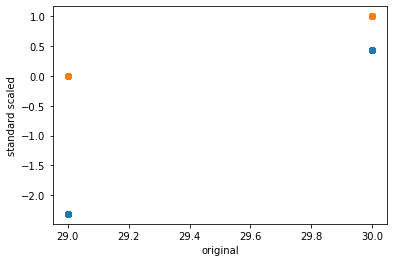

In [200]:
plt.scatter(train["Temp"], train_ss, alpha=0.3)
plt.scatter(train["Temp"], train_mm, alpha=0.3)

plt.ylabel("standard scaled")
plt.xlabel("original");

Text(0, 0.5, 'temperture')

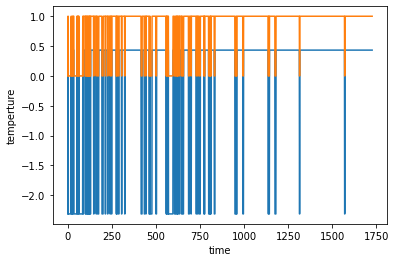

In [201]:
plt.plot(train_ss)
plt.plot(train_mm)
plt.xlabel('time')
plt.ylabel('temperture')

In [192]:
!pip install statsmodels==0.12.1

In [193]:
from statsmodels.tsa.seasonal import seasonal_decompose


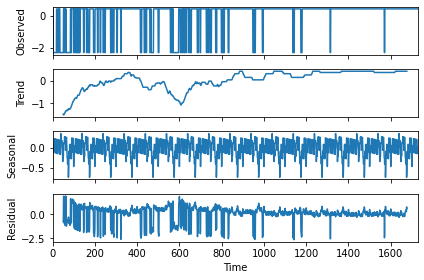

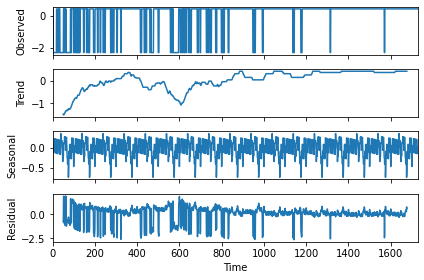

In [202]:
result = seasonal_decompose(train_ss, model='additive', freq=100)
result.plot()

In [203]:
len(train_ss)

1727

In [204]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [206]:
n_input=3
n_feature =1
generator = TimeseriesGenerator(train_ss,train_ss,length=n_input,batch_size=1)

In [207]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[-2.31284775  0.43236741  0.43236741]
Predict this y: 
 [[-2.31284775]]


In [208]:
X.shape

(1, 3, 1)

In [209]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(train_ss,train_ss, length=n_input, batch_size=1)

In [210]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [211]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [212]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [213]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
1715/1715 [==============================] - 11s 6ms/step - loss: 0.5631
Epoch 2/50
1715/1715 [==============================] - 10s 6ms/step - loss: 0.4503
Epoch 3/50
1715/1715 [==============================] - 10s 6ms/step - loss: 0.4360
Epoch 4/50
1715/1715 [==============================] - 9s 5ms/step - loss: 0.4324
Epoch 5/50
1715/1715 [==============================] - 9s 5ms/step - loss: 0.4324
Epoch 6/50
1715/1715 [==============================] - 10s 6ms/step - loss: 0.4318
Epoch 7/50
1715/1715 [==============================] - 11s 6ms/step - loss: 0.4256
Epoch 8/50
1715/1715 [==============================] - 10s 6ms/step - loss: 0.4246
Epoch 9/50
1715/1715 [==============================] - 10s 6ms/step - loss: 0.4207
Epoch 10/50
1715/1715 [==============================] - 10s 6ms/step - loss: 0.4239
Epoch 11/50
1715/1715 [==============================] - 10s 6ms/step - loss: 0.4165
Epoch 12/50
1715/1715 [==============================] - 10s 6ms/step - loss

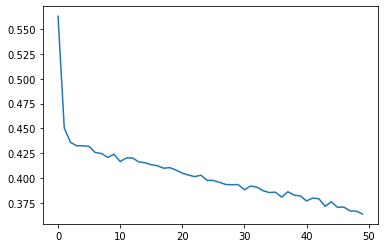

In [214]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [216]:
last_train_batch = train_ss[-12:]

In [217]:
last_train_batch = last_train_batch.reshape((1, n_input, n_feature))

In [218]:
model.predict(last_train_batch)

array([[0.38692418]], dtype=float32)

In [221]:
test_ss[0]

array([1.85066395])

In [ ]:
test_predictions = []

first_eval_batch = train_ss[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_feature))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

In [ ]:
test["Predictions"] = true_predictions

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)